In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
#load data
df = pd.read_csv('/content/Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Drop unnecessary columns
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"], errors='ignore')


In [8]:
# Encode categorical variables
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])  # Male=1, Female=0
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

In [9]:
# Check if 'Exited' column exists
if "Exited" not in df.columns:
    raise ValueError("Error: 'Exited' column not found. Please check the dataset.")


In [10]:
# Define features and target
X = df.drop(columns=["Exited"])
y = df["Exited"]

In [11]:
# Check class distribution
print("\nClass Distribution:")
print(y.value_counts())


Class Distribution:
Exited
0    7963
1    2037
Name: count, dtype: int64


In [12]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [14]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
log_model = LogisticRegression(max_iter=500)

In [16]:
# Train models
rf_model.fit(X_train, y_train)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [17]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_log = log_model.predict(X_test)


In [18]:
# Evaluate Random Forest
print("\n🔹 Random Forest Results 🔹")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


🔹 Random Forest Results 🔹
Accuracy: 0.8185
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      1593
           1       0.55      0.63      0.59       407

    accuracy                           0.82      2000
   macro avg       0.72      0.75      0.74      2000
weighted avg       0.83      0.82      0.82      2000



In [19]:
# Evaluate Logistic Regression
print("\n🔹 Logistic Regression Results 🔹")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))



🔹 Logistic Regression Results 🔹
Accuracy: 0.7450
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1593
           1       0.41      0.55      0.47       407

    accuracy                           0.74      2000
   macro avg       0.64      0.67      0.65      2000
weighted avg       0.78      0.74      0.76      2000



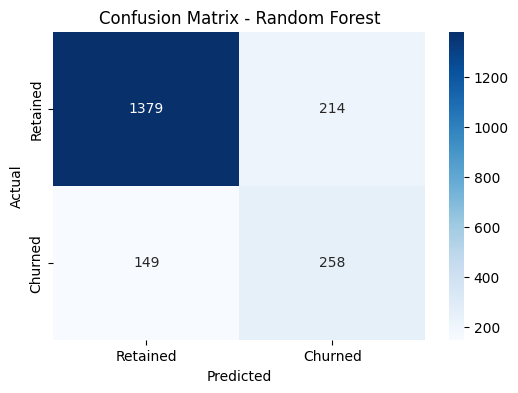

In [20]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=['Retained', 'Churned'], yticklabels=['Retained', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

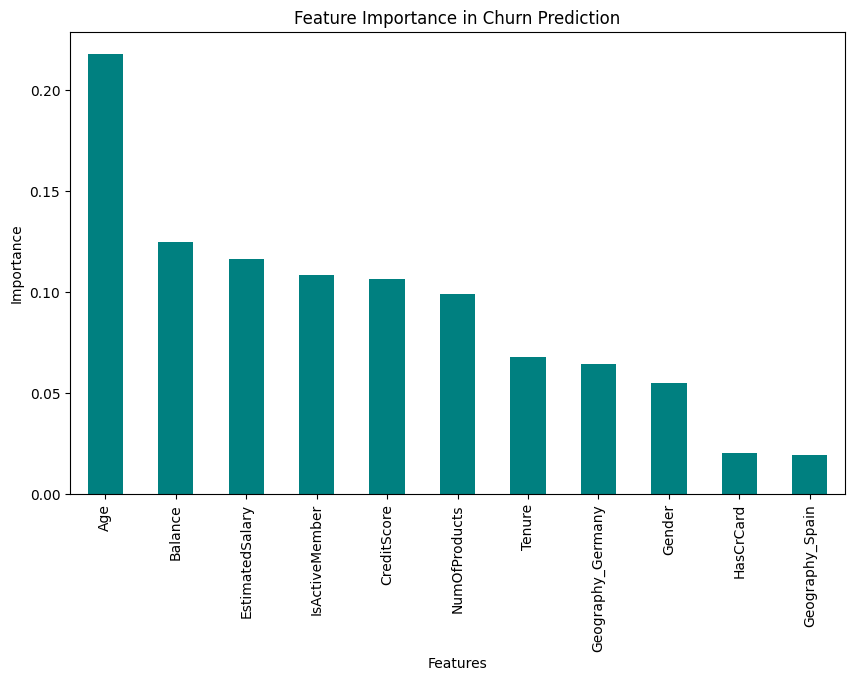

In [21]:
# Feature Importance (Random Forest)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='teal')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Churn Prediction')
plt.show()